<a href="https://colab.research.google.com/github/NabilahSharfina/CELERATES-ACCELERATION-PROGRAM/blob/main/Final_Project_Credit_Risk_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><bold>FINAL PROJECT</bold></center><h1>
<h1><center><bold>BIG DATA AND BUSINESS INTELLIGENCE</bold></center><h1>
<h1><center><bold>KAMPUS MERDEKA</bold></center><h1>
<h2><center><bold>CREDIT RISK ANALYSIS</bold></center><h2>

---



# **A. WEEK 1 - DATA PREPARATION: PART 1**

## Connect Google Drive

In [1]:
# Load data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Import Library

In [2]:
import pandas as pd # for handling and cleaning the dataset
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

## 2. EDA Dataset

### a. Dataset Female & Male

#### 1) Import Data

In [3]:
female = pd.read_excel("/content/drive/MyDrive/KAMPUS MERDEKA /Celerates Acceleration Program /FINAL PROJECT/Dataset/application_history_f.xlsx")
female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294360 entries, 0 to 294359
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id_customer          294360 non-null  int64  
 1   JK                   294360 non-null  object 
 2   KepemilikanMobil     294360 non-null  object 
 3   KepemilikanProperti  294360 non-null  object 
 4   JmlAnak              294360 non-null  int64  
 5   Pendapatan           294360 non-null  float64
 6   TipePendapatan       294360 non-null  object 
 7   TingkatPendidikan    294360 non-null  object 
 8   StatusKeluarga       294360 non-null  object 
 9   TipeRumah            294360 non-null  object 
 10  FlagMobile           294360 non-null  int64  
 11  FlagWorkPhone        294360 non-null  int64  
 12  FlagPhone            294360 non-null  int64  
 13  Email                294360 non-null  int64  
 14  Pekerjaan            190310 non-null  object 
 15  JmlAnggotaKeluarg

In [4]:
male = pd.read_excel("/content/drive/MyDrive/KAMPUS MERDEKA /Celerates Acceleration Program /FINAL PROJECT/Dataset/application_history_m.xlsx")
male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144096 entries, 0 to 144095
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id_customer          144096 non-null  int64  
 1   JK                   144096 non-null  object 
 2   KepemilikanMobil     144096 non-null  object 
 3   KepemilikanProperti  144096 non-null  object 
 4   JmlAnak              144096 non-null  int64  
 5   Pendapatan           144096 non-null  float64
 6   TipePendapatan       144096 non-null  object 
 7   TingkatPendidikan    144096 non-null  object 
 8   StatusKeluarga       144096 non-null  object 
 9   TipeRumah            144096 non-null  object 
 10  FlagMobile           144096 non-null  int64  
 11  FlagWorkPhone        144096 non-null  int64  
 12  FlagPhone            144096 non-null  int64  
 13  Email                144096 non-null  int64  
 14  Pekerjaan            113903 non-null  object 
 15  JmlAnggotaKeluarg

#### 2) Application Merge Data  

In [5]:
app_df = pd.merge(female, male, how='outer')
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438456 entries, 0 to 438455
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id_customer          438456 non-null  int64  
 1   JK                   438456 non-null  object 
 2   KepemilikanMobil     438456 non-null  object 
 3   KepemilikanProperti  438456 non-null  object 
 4   JmlAnak              438456 non-null  int64  
 5   Pendapatan           438456 non-null  float64
 6   TipePendapatan       438456 non-null  object 
 7   TingkatPendidikan    438456 non-null  object 
 8   StatusKeluarga       438456 non-null  object 
 9   TipeRumah            438456 non-null  object 
 10  FlagMobile           438456 non-null  int64  
 11  FlagWorkPhone        438456 non-null  int64  
 12  FlagPhone            438456 non-null  int64  
 13  Email                438456 non-null  int64  
 14  Pekerjaan            304213 non-null  object 
 15  JmlAnggotaKeluarg

#### 3) Rename Data

In [6]:
# Rename 'JK', 'Age', dan 'Experience' Columns
app_df.rename(
    columns = {'JK':'JenisKelamin', 
               'Age':'Usia',
               'Experience':'Pengalaman'
               }, inplace=True
              )

In [7]:
set(app_df['TingkatPendidikan'])

{'G', 'PG', 'UG'}

In [8]:
set(app_df['StatusKeluarga'])

{'D', 'M', 'NM'}

In [9]:
set(app_df['TipeRumah'])

{'MA', 'MH', 'OA', 'PH', 'RA'}

In [10]:
# Replaced value of 'TingkatPendidikan'
app_df = app_df.replace({'TingkatPendidikan':
                                    {
                                      'G': 'Graduate', 
                                      'PG': 'Post Graduate', 
                                      'UG': 'Under Graduate'
                                    }
                                  }
                                  )

# Replaced value of 'StatusKeluarga'
app_df = app_df.replace({'StatusKeluarga':
                                    {
                                      'D': 'Cerai', 
                                      'M': 'Menikah', 
                                      'NM': 'Belum Menikah'
                                    }
                                  }
                                  )

# Replaced value of 'TipeRumah' 
app_df = app_df.replace({'TipeRumah':
                                    {
                                      'MA': 'Apartment Pribadi', 
                                      'MH': 'Rumah Pribadi', 
                                      'OA': 'Apartment Kantor',
                                      'PH': 'Rumah Orang Tua', 
                                      'RA': 'Sewa Apartment'
                                    }
                                  }
                                )
app_df.head()

,Id_customer,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Usia,Pengalaman
0,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8
1,5008809,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8
2,5008810,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8
3,5008811,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8
4,5008812,Perempuan,Tidak,Ya,0,283500.0,Pensioner,Post Graduate,Cerai,Rumah Pribadi,1,0,0,0,NaN,1,62,1001


#### 4) Missing Value

In [11]:
app_df.isnull().sum()

Id_customer                 0
JenisKelamin                0
KepemilikanMobil            0
KepemilikanProperti         0
JmlAnak                     0
Pendapatan                  0
TipePendapatan              0
TingkatPendidikan           0
StatusKeluarga              0
TipeRumah                   0
FlagMobile                  0
FlagWorkPhone               0
FlagPhone                   0
Email                       0
Pekerjaan              134243
JmlAnggotaKeluarga          0
Usia                        0
Pengalaman                  0
dtype: int64

In [12]:
# Drop 'Pekerjaan' column
application = app_df.drop('Pekerjaan', axis = 1)
application

,Id_customer,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Usia,Pengalaman
0,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,52,8
1,5008809,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,52,8
2,5008810,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,52,8
3,5008811,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,52,8
4,5008812,Perempuan,Tidak,Ya,0,283500.0,Pensioner,Post Graduate,Cerai,Rumah Pribadi,1,0,0,0,1,62,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438451,6837707,Laki-laki,Tidak,Ya,0,202500.0,Bekerja,Post Graduate,Menikah,Rumah Pribadi,1,1,0,0,2,37,6
438452,6837905,Laki-laki,Ya,Ya,1,355050.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,3,44,7
438453,6837906,Laki-laki,Ya,Ya,1,355050.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,3,44,7
438454,6839936,Laki-laki,Ya,Ya,1,135000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,3,34,6


#### 5) Unique Value

In [13]:
# Unique value in each columns
pd.Series({col:application[col].nunique() for col in application})

Id_customer            438310
JenisKelamin                2
KepemilikanMobil            2
KepemilikanProperti         2
JmlAnak                    12
Pendapatan                866
TipePendapatan              5
TingkatPendidikan           3
StatusKeluarga              3
TipeRumah                   5
FlagMobile                  1
FlagWorkPhone               2
FlagPhone                   2
Email                       2
JmlAnggotaKeluarga         13
Usia                       49
Pengalaman                 49
dtype: int64

#### 6) Check Duplicate Data

In [14]:
# Check duplicates value
application.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
438451    False
438452    False
438453    False
438454    False
438455    False
Length: 438456, dtype: bool

In [15]:
# Drop duplicates on Id_customer
application_df = application.drop_duplicates(subset='Id_customer', keep='last')
application_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438310 entries, 0 to 438455
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id_customer          438310 non-null  int64  
 1   JenisKelamin         438310 non-null  object 
 2   KepemilikanMobil     438310 non-null  object 
 3   KepemilikanProperti  438310 non-null  object 
 4   JmlAnak              438310 non-null  int64  
 5   Pendapatan           438310 non-null  float64
 6   TipePendapatan       438310 non-null  object 
 7   TingkatPendidikan    438310 non-null  object 
 8   StatusKeluarga       438310 non-null  object 
 9   TipeRumah            438310 non-null  object 
 10  FlagMobile           438310 non-null  int64  
 11  FlagWorkPhone        438310 non-null  int64  
 12  FlagPhone            438310 non-null  int64  
 13  Email                438310 non-null  int64  
 14  JmlAnggotaKeluarga   438310 non-null  int64  
 15  Usia             

In [16]:
test_duplicate = application_df[application_df['Id_customer'] == 5009315]
test_duplicate

,Id_customer,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Usia,Pengalaman
376,5009315,Perempuan,Ya,Tidak,0,135000.0,Pensioner,Graduate,Menikah,Rumah Pribadi,1,0,1,1,2,55,1001


In [17]:
# Clean from duplicates value
application_df.duplicated()

0         False
1         False
2         False
3         False
5         False
          ...  
438451    False
438452    False
438453    False
438454    False
438455    False
Length: 438310, dtype: bool

#### 7) Save to CSV

In [18]:
# Save dataset to csv
application_df.to_csv('application.csv')

### b. Dataset Credit History

#### 1) Import Data

In [19]:
credit = pd.read_csv("/content/drive/MyDrive/KAMPUS MERDEKA /Celerates Acceleration Program /FINAL PROJECT/Dataset/credit_history_text.csv")
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043986 entries, 0 to 1043985
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   Id_customer  1043986 non-null  int64 
 1   Overdue      1043986 non-null  object
dtypes: int64(1), object(1)
memory usage: 15.9+ MB


In [20]:
credit

,Id_customer,Overdue
0,5001711,Tidak memiliki pinjaman
1,5001711,0
2,5001711,0
3,5001711,0
4,5001712,0
...,...,...
1043981,5150487,0
1043982,5150487,0
1043983,5150487,0
1043984,5150487,0


#### 2) Replace Value Overdue

In [21]:
# Overwriting rows with replaced value of overdue which 'Tidak memiliki pinjaman' = -1
credit['Overdue'] = credit['Overdue'].replace('Tidak memiliki pinjaman', -1)
credit['Overdue'] = credit['Overdue'].astype(int)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043986 entries, 0 to 1043985
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   Id_customer  1043986 non-null  int64
 1   Overdue      1043986 non-null  int64
dtypes: int64(2)
memory usage: 15.9 MB


In [22]:
overdue_dummy = pd.get_dummies(credit['Overdue'])
overdue_dummy.head()

,-1,0,1,2,3,4,5
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


#### 3) Duplicate Value

In [23]:
# Check duplicates value
credit.duplicated()

0          False
1          False
2           True
3           True
4          False
           ...  
1043981     True
1043982     True
1043983     True
1043984     True
1043985     True
Length: 1043986, dtype: bool

In [24]:
credit

,Id_customer,Overdue
0,5001711,-1
1,5001711,0
2,5001711,0
3,5001711,0
4,5001712,0
...,...,...
1043981,5150487,0
1043982,5150487,0
1043983,5150487,0
1043984,5150487,0


#### 4) Find Overdue Max Value

In [25]:
# Mengambil nilai max 'Overdue' dari 'Id_customer'
overdue_max = credit.groupby(['Id_customer'], sort=False)['Overdue'].max()
overdue_max = pd.DataFrame(data = overdue_max).reset_index()
overdue_max

,Id_customer,Overdue
0,5001711,0
1,5001712,0
2,5001713,-1
3,5001714,-1
4,5001715,-1
...,...,...
45780,5150482,0
45781,5150483,-1
45782,5150484,0
45783,5150485,0


In [26]:
test_max = overdue_max[overdue_max['Id_customer'] == 5001714]['Overdue'].max()
test_max

-1

In [27]:
credit_history = overdue_max.drop_duplicates(subset='Id_customer', keep='last')
credit_history.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45785 entries, 0 to 45784
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Id_customer  45785 non-null  int64
 1   Overdue      45785 non-null  int64
dtypes: int64(2)
memory usage: 1.0 MB


In [28]:
credit_history

,Id_customer,Overdue
0,5001711,0
1,5001712,0
2,5001713,-1
3,5001714,-1
4,5001715,-1
...,...,...
45780,5150482,0
45781,5150483,-1
45782,5150484,0
45783,5150485,0


#### 5) Unique Value 

In [29]:
credit_history.groupby('Overdue')['Id_customer'].nunique()

Overdue
-1     4536
 0    35976
 1     4617
 2      328
 3       87
 4       48
 5      193
Name: Id_customer, dtype: int64

#### 6) Check Duplicate Value 

In [30]:
# Clean from duplicates value
credit_history.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45780    False
45781    False
45782    False
45783    False
45784    False
Length: 45785, dtype: bool

#### 7) Save to CSV

In [31]:
# Save dataset to csv
credit_history.to_csv('credit_history.csv')

## 3. Join All Dataset

### a. Merge Application & Credit History

In [32]:
credit_risk = pd.merge(application_df, credit_history, on='Id_customer', how='inner')
credit_risk

,Id_customer,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Usia,Pengalaman,Overdue
0,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,52,8,0
1,5008809,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,52,8,-1
2,5008810,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,52,8,0
3,5008811,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,52,8,0
4,5008812,Perempuan,Tidak,Ya,0,283500.0,Pensioner,Post Graduate,Cerai,Rumah Pribadi,1,0,0,0,1,62,1001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36252,5149158,Laki-laki,Ya,Ya,0,247500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,1,0,0,2,30,10,2
36253,5149190,Laki-laki,Ya,Tidak,1,450000.0,Bekerja,Post Graduate,Menikah,Rumah Pribadi,1,0,1,1,3,27,1,5
36254,5149729,Laki-laki,Ya,Ya,0,90000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,2,52,5,2
36255,5149828,Laki-laki,Ya,Ya,0,315000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,2,48,7,5


In [33]:
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36257 entries, 0 to 36256
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id_customer          36257 non-null  int64  
 1   JenisKelamin         36257 non-null  object 
 2   KepemilikanMobil     36257 non-null  object 
 3   KepemilikanProperti  36257 non-null  object 
 4   JmlAnak              36257 non-null  int64  
 5   Pendapatan           36257 non-null  float64
 6   TipePendapatan       36257 non-null  object 
 7   TingkatPendidikan    36257 non-null  object 
 8   StatusKeluarga       36257 non-null  object 
 9   TipeRumah            36257 non-null  object 
 10  FlagMobile           36257 non-null  int64  
 11  FlagWorkPhone        36257 non-null  int64  
 12  FlagPhone            36257 non-null  int64  
 13  Email                36257 non-null  int64  
 14  JmlAnggotaKeluarga   36257 non-null  int64  
 15  Usia                 36257 non-null 

### b. Binning 

In [34]:
# Mengelompokkan 'Usia' menjadi beberapa kategori:
# '10-24': remaja, '25-44': dewasa, '45-64': lansia, dan '>=65': manula 
credit_risk['KategoriUsia'] = pd.cut(x=credit_risk['Usia'], bins=[10, 25, 45, 65, 75], labels=['remaja', 'dewasa', 'lansia', 'manula'])
credit_risk['KategoriUsia']

0        lansia
1        lansia
2        lansia
3        lansia
4        lansia
          ...  
36252    dewasa
36253    dewasa
36254    lansia
36255    lansia
36256    remaja
Name: KategoriUsia, Length: 36257, dtype: category
Categories (4, object): ['remaja' < 'dewasa' < 'lansia' < 'manula']

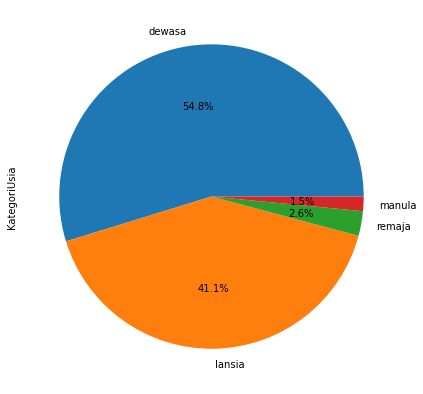

In [35]:
credit_risk['KategoriUsia'].value_counts().plot(figsize=(7,7),kind='pie', autopct = "%.1f%%")

### c. Split Overdue (Good & Bad)

In [36]:
condition = [
    credit_risk.Overdue < 1,
    credit_risk.Overdue >= 1
]
labels = ['0', '1'] # good = 0, bad = 1
credit_risk['CreditStatus'] = np.select(condition, labels)
credit_risk.CreditStatus.value_counts()

credit_risk

,Id_customer,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Usia,Pengalaman,Overdue,KategoriUsia,CreditStatus
0,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,52,8,0,lansia,0
1,5008809,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,52,8,-1,lansia,0
2,5008810,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,52,8,0,lansia,0
3,5008811,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,52,8,0,lansia,0
4,5008812,Perempuan,Tidak,Ya,0,283500.0,Pensioner,Post Graduate,Cerai,Rumah Pribadi,1,0,0,0,1,62,1001,0,lansia,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36252,5149158,Laki-laki,Ya,Ya,0,247500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,1,0,0,2,30,10,2,dewasa,1
36253,5149190,Laki-laki,Ya,Tidak,1,450000.0,Bekerja,Post Graduate,Menikah,Rumah Pribadi,1,0,1,1,3,27,1,5,dewasa,1
36254,5149729,Laki-laki,Ya,Ya,0,90000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,2,52,5,2,lansia,1
36255,5149828,Laki-laki,Ya,Ya,0,315000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,2,48,7,5,lansia,1


### d. Clean Data

In [37]:
# Menghapus kolom yang tidak digunakan
credit_risk = credit_risk.drop(columns=['Usia', 'Overdue'])
credit_risk

,Id_customer,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus
0,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,8,lansia,0
1,5008809,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,8,lansia,0
2,5008810,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,8,lansia,0
3,5008811,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,8,lansia,0
4,5008812,Perempuan,Tidak,Ya,0,283500.0,Pensioner,Post Graduate,Cerai,Rumah Pribadi,1,0,0,0,1,1001,lansia,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36252,5149158,Laki-laki,Ya,Ya,0,247500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,1,0,0,2,10,dewasa,1
36253,5149190,Laki-laki,Ya,Tidak,1,450000.0,Bekerja,Post Graduate,Menikah,Rumah Pribadi,1,0,1,1,3,1,dewasa,1
36254,5149729,Laki-laki,Ya,Ya,0,90000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,2,5,lansia,1
36255,5149828,Laki-laki,Ya,Ya,0,315000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,2,7,lansia,1


In [38]:
# Check duplicates value
credit_risk.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
36252    False
36253    False
36254    False
36255    False
36256    False
Length: 36257, dtype: bool

In [39]:
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36257 entries, 0 to 36256
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id_customer          36257 non-null  int64   
 1   JenisKelamin         36257 non-null  object  
 2   KepemilikanMobil     36257 non-null  object  
 3   KepemilikanProperti  36257 non-null  object  
 4   JmlAnak              36257 non-null  int64   
 5   Pendapatan           36257 non-null  float64 
 6   TipePendapatan       36257 non-null  object  
 7   TingkatPendidikan    36257 non-null  object  
 8   StatusKeluarga       36257 non-null  object  
 9   TipeRumah            36257 non-null  object  
 10  FlagMobile           36257 non-null  int64   
 11  FlagWorkPhone        36257 non-null  int64   
 12  FlagPhone            36257 non-null  int64   
 13  Email                36257 non-null  int64   
 14  JmlAnggotaKeluarga   36257 non-null  int64   
 15  Pengalaman         

### e. Correlation 

In [40]:
credit_risk.describe()

,Id_customer,JmlAnak,Pendapatan,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman
count,3.625700e+04,36257.000000,3.625700e+04,36257.0,36257.000000,36257.000000,36257.000000,36257.000000,36257.000000
mean,5.078205e+06,0.430427,1.866255e+05,1.0,0.225529,0.294812,0.089859,2.198720,174.416058
std,4.186848e+04,0.742474,1.015486e+05,0.0,0.417936,0.455965,0.285983,0.911781,371.770973
min,5.008804e+06,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.042025e+06,0.000000,1.215000e+05,1.0,0.000000,0.000000,0.000000,2.000000,3.000000
50%,5.074584e+06,0.000000,1.575000e+05,1.0,0.000000,0.000000,0.000000,2.000000,7.000000
75%,5.114650e+06,1.000000,2.250000e+05,1.0,0.000000,1.000000,0.000000,3.000000,16.000000
max,5.150487e+06,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,1001.000000


In [41]:
credit_risk.describe(include=[object])

,JenisKelamin,KepemilikanMobil,KepemilikanProperti,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,CreditStatus
count,36257,36257,36257,36257,36257,36257,36257,36257
unique,2,2,2,5,3,3,5,2
top,Perempuan,Tidak,Ya,Bekerja,Graduate,Menikah,Rumah Pribadi,0
freq,24279,22476,24367,18708,26046,27845,32367,32043


In [42]:
credit_risk.corr()

,Id_customer,JmlAnak,Pendapatan,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman
Id_customer,1.000000,0.028657,-0.018353,NaN,0.079229,0.009880,-0.047017,0.026196,-0.038913
JmlAnak,0.028657,1.000000,0.033966,NaN,0.048033,-0.016770,0.015415,0.889197,-0.231313
Pendapatan,-0.018353,0.033966,1.000000,NaN,-0.037265,0.018073,0.087229,0.024134,-0.169050
FlagMobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FlagWorkPhone,0.079229,0.048033,-0.037265,NaN,1.000000,0.312099,-0.035255,0.064640,-0.242498
FlagPhone,0.009880,-0.016770,0.018073,NaN,0.312099,1.000000,0.010471,-0.004652,-0.005600
Email,-0.047017,0.015415,0.087229,NaN,-0.035255,0.010471,1.000000,0.014129,-0.087042
JmlAnggotaKeluarga,0.026196,0.889197,0.024134,NaN,0.064640,-0.004652,0.014129,1.000000,-0.223191
Pengalaman,-0.038913,-0.231313,-0.169050,NaN,-0.242498,-0.005600,-0.087042,-0.223191,1.000000


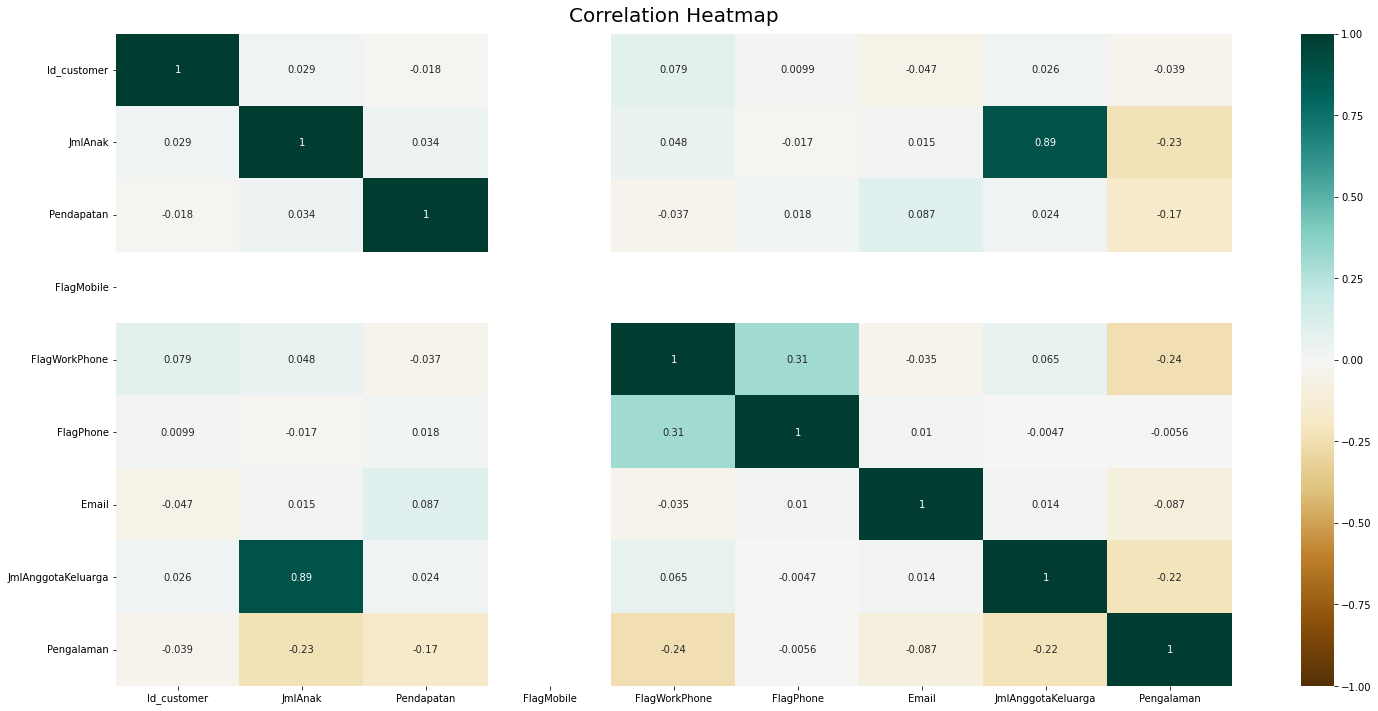

In [43]:
plt.figure(figsize=(25, 12))
heatmap = sns.heatmap(credit_risk.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

## 6. Save Dataset

In [44]:
# Save dataset to csv
credit_risk.to_csv('credit_risk.csv')

## 7. Download File

In [45]:
from google.colab import files

files.download('/content/application.csv')
files.download('/content/credit_history.csv')
files.download('/content/credit_risk.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>